In [1]:
import numpy as np
from dipy.io.image import save_nifti, load_nifti
import torchio as tio
import torch
import torchio.transforms as transforms
import matplotlib.pyplot as plt

def show_img(img):
    #cv2.imwrite(img_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    #print(img.shape)
    img = np.squeeze(img)
    plt.figure(dpi=150)
    plt.imshow(img, cmap='gray')
#    plt.colorbar()
    plt.show()

c:\Users\NUGURI\anaconda3\envs\JHL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataroot= 'mprage_BCP_G.nii'
raw_data, _ = load_nifti(dataroot)
print('Loaded data of size:', raw_data.shape)
print(type(raw_data))

Loaded data of size: (300, 320, 208, 1)
<class 'numpy.memmap'>


### Min, Max, Mean, Std

In [3]:
max_value = np.max(raw_data)
print("Max:", max_value)

min_value = np.min(raw_data)
print("Min:", min_value)

mean_value = np.mean(raw_data)
print("Mean:", mean_value)

std_value = np.std(raw_data)
print("Std:", std_value)

Max: 839
Min: 0
Mean: 26.308328525641027
Std: 52.68783693019915


### Source code for torchio.transforms.augmentation.intensity.random_ghost

In [4]:
subject = tio.Subject(
    image=tio.ScalarImage('mprage_BCP_G.nii'),
)

In [7]:
ghosting_transform = transforms.RandomGhosting(num_ghosts=(1, 3), intensity=(0.5, 1.0))
transformed_subject = ghosting_transform(subject)

artifact_data = transformed_subject.image.data.numpy()

print(artifact_data.shape)

n_max_value = np.max(artifact_data)
print("N_Max:", n_max_value)

n_min_value = np.min(artifact_data)
print("N_Min:", n_min_value)

n_mean_value = np.mean(artifact_data)
print("N_Mean:", n_mean_value)

n_std_value = np.std(artifact_data)
print("N_Std:", n_std_value)

(1, 300, 320, 208)
N_Max: 603.4219
N_Min: -5.7456093
N_Mean: 26.308317
N_Std: 42.380642


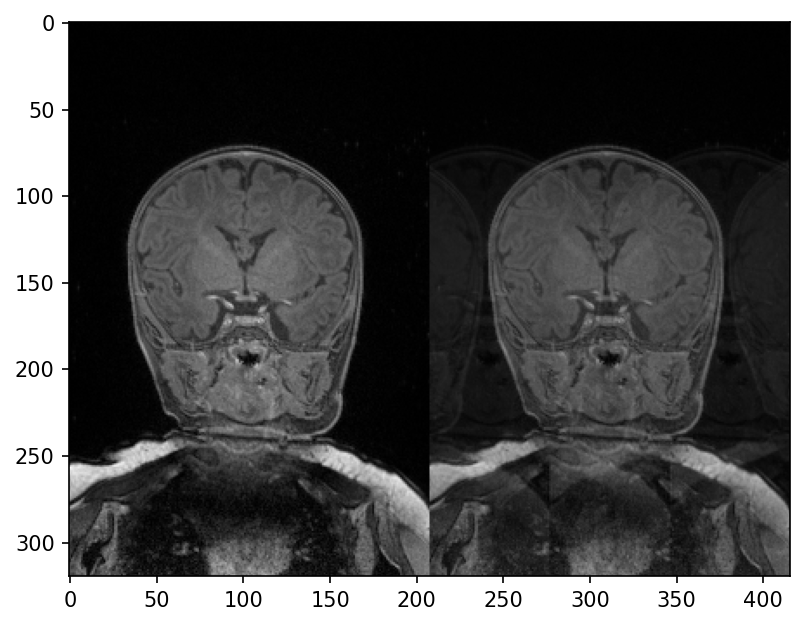

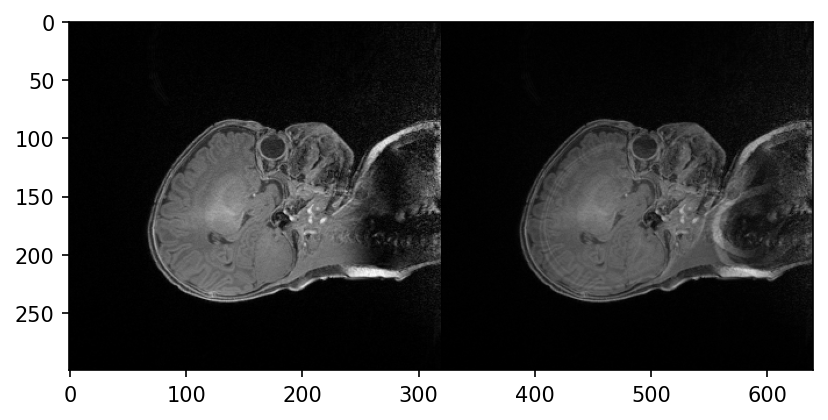

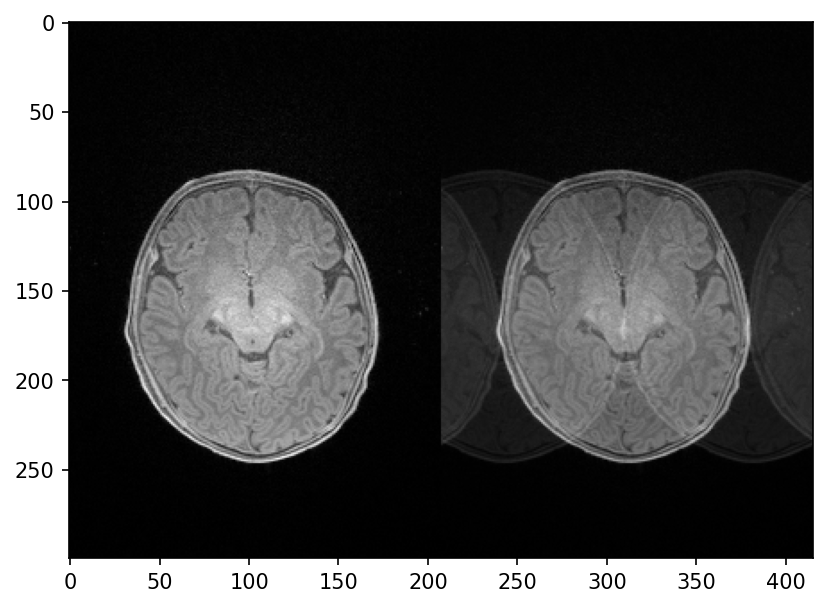

In [8]:
xx = 150
yy = 80
zz = 150
show_img(np.concatenate((raw_data[xx,:,:,:].squeeze(), artifact_data[:,xx,:,:].squeeze()),1))
show_img(np.concatenate((raw_data[:,:,yy,:].squeeze(), artifact_data[:,:,:,yy].squeeze()),1))
show_img(np.concatenate((raw_data[:,zz,:,:].squeeze(), artifact_data[:,:,zz,:].squeeze()),1))

In [9]:
print(raw_data.shape)
print(artifact_data.shape)

(300, 320, 208, 1)
(1, 300, 320, 208)


In [10]:
np.save('BCP_G_clean.npy', raw_data.squeeze())

In [11]:
np.save('BCP_G_artifact.npy', artifact_data.squeeze())

In [12]:
import numpy as np
raw_dat = np.load('BCP_G_clean.npy')
print('Loaded data of size:', raw_data.shape)

noisy_data = np.load('BCP_G_artifact.npy')
print('Loaded data of size:', raw_data.shape)

Loaded data of size: (300, 320, 208, 1)
Loaded data of size: (300, 320, 208, 1)


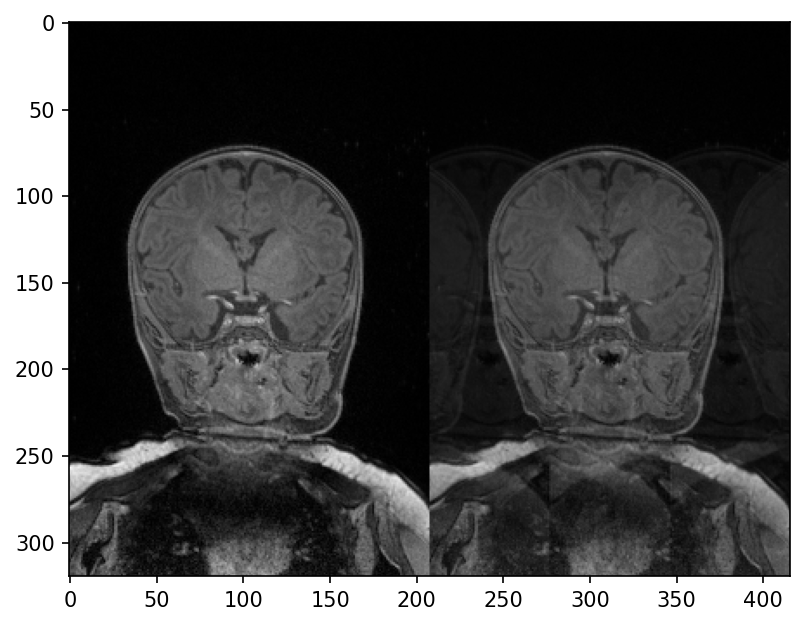

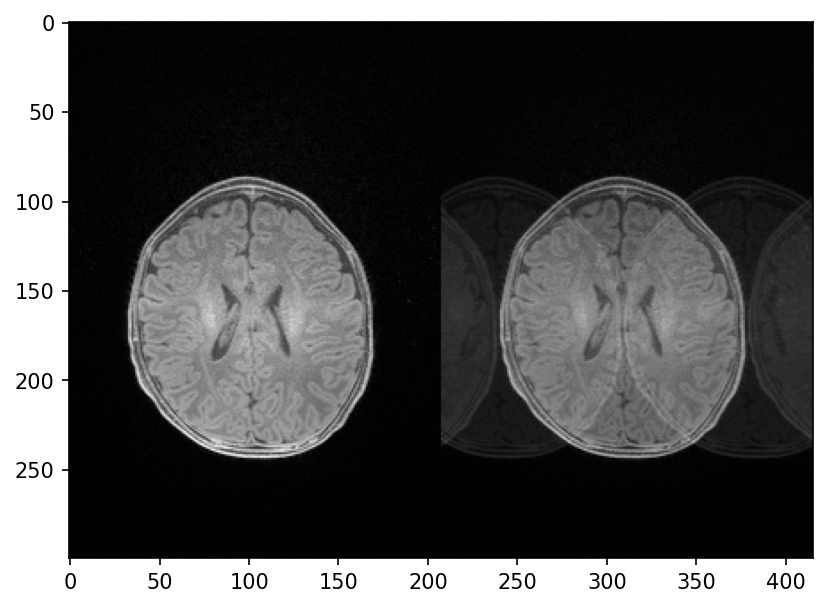

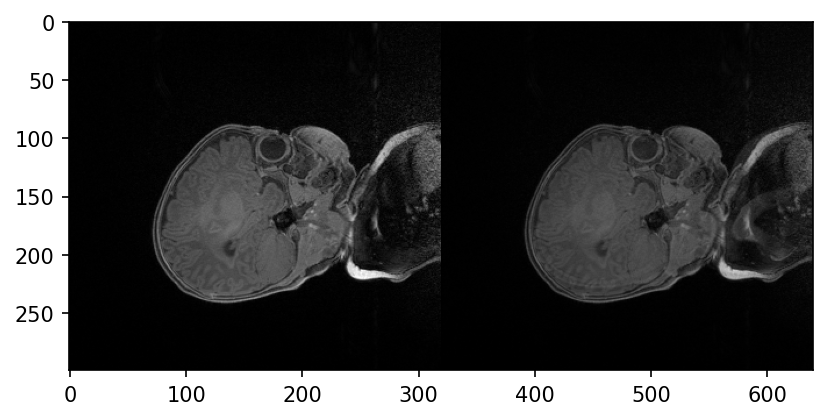

In [13]:
xx = 150
yy = 120
zz = 130
show_img(np.concatenate((raw_data[xx,:,:].squeeze(), noisy_data[xx,:,:].squeeze()),1))
show_img(np.concatenate((raw_data[:,zz,:].squeeze(), noisy_data[:,zz,:].squeeze()),1))
show_img(np.concatenate((raw_data[:,:,yy].squeeze(), noisy_data[:,:,yy].squeeze()),1))